# **Classifying cats and dogs using deep learning**

## Data preparation

In [1]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2019-05-31 03:02:18--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 173.223.196.127, 2600:1408:8400:385::e59, 2600:1408:8400:3a9::e59
Connecting to download.microsoft.com (download.microsoft.com)|173.223.196.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  35.5MB/s    in 26s     

2019-05-31 03:02:44 (30.6 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



In [0]:
!unzip kagglecatsanddogs_3367a.zip

In [3]:
!ls -la

total 805628
drwxr-xr-x 1 root root      4096 May 31 03:04  .
drwxr-xr-x 1 root root      4096 May 31 02:11  ..
drwxr-xr-x 1 root root      4096 May 28 16:05  .config
-rw-r--r-- 1 root root 824894548 Feb 10  2017  kagglecatsanddogs_3367a.zip
-rw-r--r-- 1 root root     35545 Feb 10  2017 'MSR-LA - 3467.docx'
drwxr-xr-x 4 root root      4096 May 31 03:03  PetImages
-rw-r--r-- 1 root root       104 Feb 10  2017 'readme[1].txt'
drwxr-xr-x 1 root root      4096 May 24 16:08  sample_data


## **Data Preprocessing**


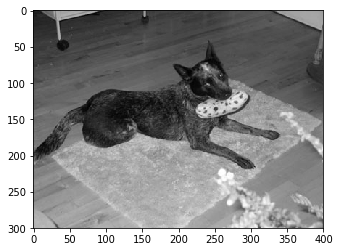

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os, cv2

DATADIR = '/content/PetImages'
CATEGORIES = ['Dog', 'Cat']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

In [25]:
# Since the images are in different shapes, we need to normalize them
print(img_array.shape)

(300, 400)


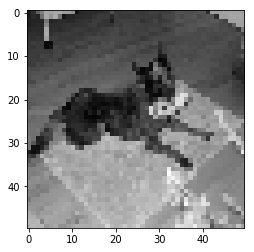

In [26]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

plt.imshow(new_array, cmap='gray')
plt.show()

In [0]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()


In [28]:
len(training_data)

24946

In [0]:
import random

random.shuffle(training_data)

In [30]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
0
0
1
0
1
1


In [0]:
X = []
y = []

In [0]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Building a Convolutional Neural Network to classify our images

In [0]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [0]:
X = X/255.0

model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) # This converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training step

In [36]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

Train on 22451 samples, validate on 2495 samples
Epoch 1/10
22451/22451 [==============================] - 5s 245us/sample - loss: 0.6358 - acc: 0.6283 - val_loss: 0.5460 - val_acc: 0.7291
Epoch 2/10
22451/22451 [==============================] - 5s 222us/sample - loss: 0.5336 - acc: 0.7358 - val_loss: 0.4992 - val_acc: 0.7559
Epoch 3/10
22451/22451 [==============================] - 5s 219us/sample - loss: 0.4807 - acc: 0.7711 - val_loss: 0.4649 - val_acc: 0.7840
Epoch 4/10
22451/22451 [==============================] - 5s 220us/sample - loss: 0.4402 - acc: 0.7967 - val_loss: 0.4634 - val_acc: 0.7836
Epoch 5/10
22451/22451 [==============================] - 5s 217us/sample - loss: 0.4086 - acc: 0.8140 - val_loss: 0.4590 - val_acc: 0.7936
Epoch 6/10
22451/22451 [==============================] - 5s 219us/sample - loss: 0.3718 - acc: 0.8339 - val_loss: 0.4556 - val_acc: 0.7972
Epoch 7/10
22451/22451 [==============================] - 5s 220us/sample - loss: 0.3433 - acc: 0.8480 - val_lo